In [306]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

train = pd.read_csv(r'/home/jcoche/machine-learning/Titanic/train.csv')
test = pd.read_csv(r'/home/jcoche/machine-learning/Titanic/test.csv')

dataset = train.append(test, ignore_index=True)



# Data exploration

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


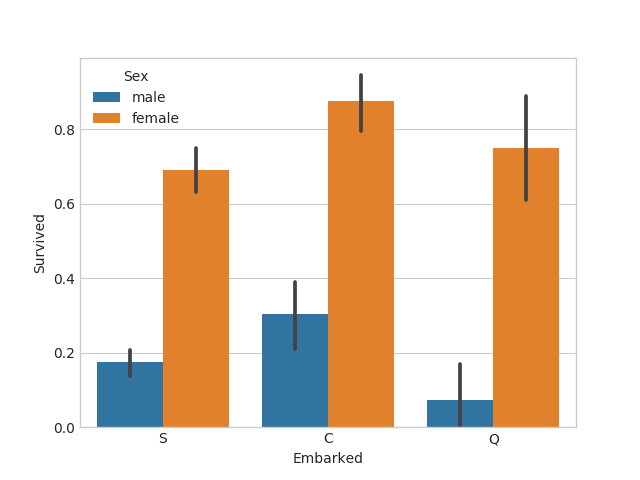

In [305]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train);

In [ ]:
def correlation(data):
    correlation = data.corr()
    figure = plt.subplots( figsize =( 12 , 10 ) )
    color_map = sns.diverging_palette( 220 , 10 , as_cmap = True )
    figure = sns.heatmap(
        correlation, 
        cmap = color_map, 
        annot = True, 
        annot_kws = { 'fontsize' : 15 }
    )

In [ ]:
correlation( train )

In [ ]:
s = train.Age.isnull().sum()
float(s) / float(891)

In [ ]:
age_ft = pd.DataFrame()
age_ft["Age"] = dataset.Age.fillna(train.Age.mean())
age_ft.head()

In [ ]:
#sex_ft = pd.Series(np.where(dataset.Sex == 'male', 1, 0), name = 'Sex')
sex_ft = pd.get_dummies(dataset.Sex, prefix='Sex')
sex_ft.head()

In [ ]:
pclass_ft = pd.DataFrame()
pclass_ft["Pclass"] = dataset.Pclass

In [ ]:
dataset_X = pd.concat([age_ft, sex_ft, pclass_ft], axis = 1)

In [ ]:
print(dataset_X)

In [ ]:
# Creation des datasets (entrainement, validation et test)

from sklearn.cross_validation import train_test_split

train_valid_x = dataset_X[0:891]
train_valid_y = dataset[:891].Survived

train_x1, valid_x1, train_y1, valid_y1 = train_test_split(train_valid_x, train_valid_y, train_size = 0.7)
test_x1 = dataset_X[891:]

test_x2 = test_x1
train_x2=train_x1
valid_x2=valid_x1
train_y2=train_y1
valid_y2=valid_y1

train_x1.pop("Pclass")
valid_x1.pop("Pclass")
test_x1.pop("Pclass")

train_x1 = train_x1
valid_x1 = valid_x1
test_x1 = test_x1


#print(train_x2.shape)

In [ ]:
print(test_x1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# model = DecisionTreeClassifier()
#model = RandomForestClassifier()
model = LogisticRegression()

"""parameters = {
    'n_estimators':[4, 6, 9],
    'max_features':['log2', 'sqrt', 'auto'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10], 
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1,5,8]
}

acc_scorer = make_scorer(accuracy_score)

grid = GridSearchCV(model, parameters, acc_scorer)
grid1 = grid.fit(train_x1, train_y1)

clf1 = grid1.best_estimator_"""

model1 = model.fit(train_x1, train_y1)

In [ ]:
"""grid = GridSearchCV(model, parameters, acc_scorer)
grid2 = grid.fit(train_x2, train_y2)

clf2 = grid2.best_estimator_"""

model2 = model.fit(train_x2, train_y2)

In [ ]:
pred1 = model1.predict(test_x1)
result1 = dataset[891:].PassengerId
test1 = pd.DataFrame({'PassengerId': result1, 'Survived': pred1})
test1.shape
test1.head()


In [ ]:
pred2 = model2.predict(test_x2)
result2 = dataset[891:].PassengerId
test2 = pd.DataFrame({'PassengerId': result2, 'Survived': pred2})
test2.shape
test2.head()

In [ ]:
from sklearn.metrics import accuracy_score, make_scorer

print(clf1.score(train_x1, train_y1), clf1.score(valid_x1, valid_y1))

In [ ]:
print(clf2.score(train_x2, train_y2), clf2.score(valid_x2, valid_y2))

In [1]:
"""0.825040128411 0.768656716418
0.820224719101 0.772388059701"""